In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
X = np.load('/kaggle/input/resnet-features/resnet_features.npy')
y = np.load('/kaggle/input/resnet-features/resnet_labels.npy')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

**Random Forest**

0.6518151815181518 -- 1
0.6749174917491749 -- 2
0.6204620462046204 -- 3
0.5379537953795379 -- 4
0.6947194719471947 -- 5
0.5742574257425742 -- 6
0.7277227722772277 -- 7
0.6006600660066007 -- 8
0.7128712871287128 -- 9
0.5775577557755776 -- 10
0.7079207920792079 -- 11
0.7326732673267327 -- 12
0.7260726072607261 -- 13
0.6963696369636964 -- 14
0.7178217821782178 -- 15
0.6831683168316832 -- 16
0.7293729372937293 -- 17
0.6518151815181518 -- 18
0.7326732673267327 -- 19
0.7194719471947195 -- 20
0.7326732673267327 -- 21
0.5759075907590759 -- 22
0.7260726072607261 -- 23
0.6006600660066007 -- 24
0.7211221122112211 -- 25
0.5891089108910891 -- 26
0.6402640264026402 -- 27
0.7244224422442245 -- 28
0.7260726072607261 -- 29
0.6501650165016502 -- 30
0.7145214521452146 -- 31
0.693069306930693 -- 32
0.7277227722772277 -- 33
0.6336633663366337 -- 34
0.7194719471947195 -- 35
0.7227722772277227 -- 36
0.6963696369636964 -- 37
0.7112211221122112 -- 38
0.5792079207920792 -- 39
0.6468646864686468 -- 40
0.71452145

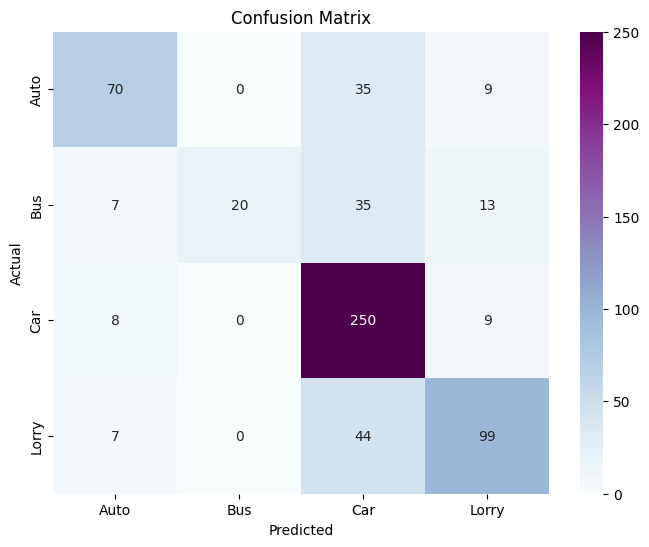

In [5]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

j = 0

# Define the objective function to maximize (accuracy)
def objective_function(params):
    global j
    j = j + 1
    n_estimators, max_depth = params

    # Create a RandomForestClassifier with the current parameters
    rf_clf = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        random_state=42
    )

    # Fit the model to the training data
    rf_clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_clf.predict(X_test)

    # Calculate accuracy (to be maximized)
    acc = accuracy_score(y_test, y_pred)
    print(acc, "--", j)
    return acc

# Ant Colony Optimization parameters
num_ants = 10
num_iterations = 10
rho = 0.1  # Pheromone decay rate
alpha = 1.0  # Pheromone importance
beta = 2.0  # Heuristic importance

# Search space
search_space = {
    'n_estimators': (50, 300),
    'max_depth': (3, 20),
}

# Initialize pheromone levels
pheromones = {param: np.ones(num_ants) for param in search_space}

# Ant Colony Optimization
for iteration in range(num_iterations):
    solutions = []

    # Construct solutions
    for ant in range(num_ants):
        solution = {}

        for param, bounds in search_space.items():
            min_val, max_val = bounds
            pheromone = pheromones[param][ant]

            # Heuristic information (random search)
            heuristic = np.random.uniform(min_val, max_val)

            # Combine pheromone and heuristic information to select parameter value
            probability = (pheromone**alpha) * (heuristic**beta)
            selected_value = np.random.uniform(min_val, max_val) if np.random.rand() < probability else heuristic

            solution[param] = selected_value

        solutions.append(solution)

    # Evaluate solutions
    scores = [objective_function([sol[param] for param in search_space]) for sol in solutions]

    # Update pheromone levels based on the objective function values
    for param, values in pheromones.items():
        for ant in range(num_ants):
            pheromones[param][ant] *= (1 - rho)
            pheromones[param][ant] += alpha * scores[ant]

# Select the best solution from the last iteration
best_solution = solutions[np.argmax(scores)]

# Create the final RandomForestClassifier with the best parameters
best_rf_clf = RandomForestClassifier(
    n_estimators=int(best_solution['n_estimators']),
    max_depth=int(best_solution['max_depth']),
    random_state=42
)

# Fit the final model to the training data
best_rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_clf.predict(X_test)

# Calculate and print accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Best Test Accuracy: {test_accuracy}')

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot a colored confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=['Auto', 'Bus', 'Car', 'Lorry'],
            yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Logistic Regression**

0.8597359735973598 -- 1
0.8646864686468647 -- 2
0.863036303630363 -- 3


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.863036303630363 -- 4
0.863036303630363 -- 5


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8646864686468647 -- 6


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8613861386138614 -- 7


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8646864686468647 -- 8
0.8613861386138614 -- 9


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8399339933993399 -- 10
0.863036303630363 -- 11
0.8613861386138614 -- 12
0.863036303630363 -- 13


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8613861386138614 -- 14
0.834983498349835 -- 15


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8646864686468647 -- 16
0.863036303630363 -- 17
0.8613861386138614 -- 18
0.863036303630363 -- 19
0.8613861386138614 -- 20
0.863036303630363 -- 21
0.863036303630363 -- 22


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.858085808580858 -- 23
0.8646864686468647 -- 24


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8646864686468647 -- 25
0.8531353135313532 -- 26
0.863036303630363 -- 27
0.8613861386138614 -- 28
0.8564356435643564 -- 29
0.8646864686468647 -- 30


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8679867986798679 -- 31
0.8646864686468647 -- 32
0.863036303630363 -- 33
0.863036303630363 -- 34
0.8663366336633663 -- 35


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8399339933993399 -- 36
0.8613861386138614 -- 37


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8646864686468647 -- 38


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8597359735973598 -- 39


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8613861386138614 -- 40
0.863036303630363 -- 41


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8432343234323433 -- 42
0.8646864686468647 -- 43
0.8415841584158416 -- 44
0.8597359735973598 -- 45


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8399339933993399 -- 46


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8679867986798679 -- 47
0.8663366336633663 -- 48
0.8531353135313532 -- 49
0.8597359735973598 -- 50
0.8646864686468647 -- 51
0.8613861386138614 -- 52
0.8613861386138614 -- 53


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.863036303630363 -- 54
0.863036303630363 -- 55
0.8646864686468647 -- 56
0.8663366336633663 -- 57
0.8646864686468647 -- 58
0.863036303630363 -- 59


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8663366336633663 -- 60
0.863036303630363 -- 61


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8448844884488449 -- 62


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8597359735973598 -- 63
0.8646864686468647 -- 64
0.8613861386138614 -- 65


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8366336633663366 -- 66


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8613861386138614 -- 67


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8663366336633663 -- 68
0.863036303630363 -- 69
0.863036303630363 -- 70
0.8597359735973598 -- 71


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.834983498349835 -- 72
0.863036303630363 -- 73
0.8646864686468647 -- 74


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.834983498349835 -- 75
0.8646864686468647 -- 76


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8597359735973598 -- 77
0.863036303630363 -- 78
0.863036303630363 -- 79


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8481848184818482 -- 80
0.8613861386138614 -- 81
0.8646864686468647 -- 82
0.8646864686468647 -- 83


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8679867986798679 -- 84


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.863036303630363 -- 85
0.8597359735973598 -- 86
0.8646864686468647 -- 87
0.8613861386138614 -- 88
0.8663366336633663 -- 89
0.863036303630363 -- 90


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8415841584158416 -- 91


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8679867986798679 -- 92
0.863036303630363 -- 93
0.863036303630363 -- 94
0.8646864686468647 -- 95


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8646864686468647 -- 96
0.8663366336633663 -- 97


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8399339933993399 -- 98
0.8613861386138614 -- 99
0.8646864686468647 -- 100
Best C, max_iter ->  0.495183368505616 553.3522726004496


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Test Accuracy: 0.8679867986798679
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       114
           1       0.87      0.79      0.83        75
           2       0.91      0.93      0.92       267
           3       0.82      0.83      0.83       150

    accuracy                           0.87       606
   macro avg       0.86      0.84      0.85       606
weighted avg       0.87      0.87      0.87       606



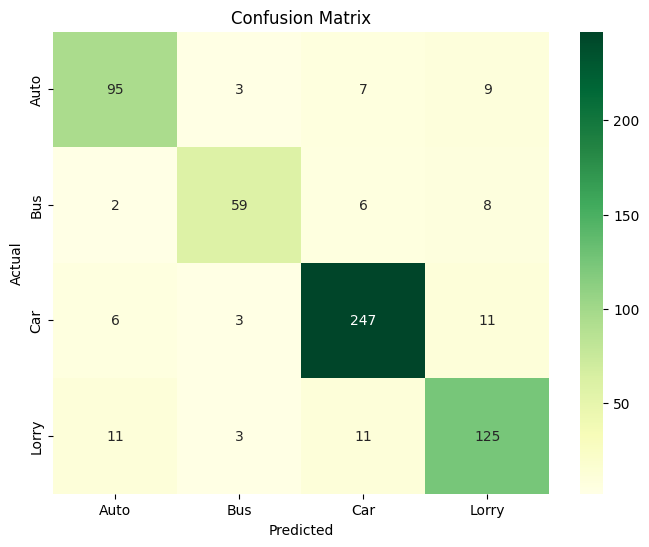

In [20]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

j = 0

# Define the objective function to maximize (accuracy)
def objective_function(params):
    global j
    j = j + 1
    C, max_iter = params

    # Create a Logistic Regression model with the current parameters
    logreg_model = LogisticRegression(
        C=C,
        max_iter=int(max_iter),
        random_state=42
    )

    # Fit the model to the training data
    logreg_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logreg_model.predict(X_test)

    # Calculate accuracy (to be maximized)
    acc = accuracy_score(y_test, y_pred)
    print(acc, "--", j)
    return acc

# Ant Colony Optimization parameters
num_ants = 10
num_iterations = 10
rho = 0.2  # Pheromone decay rate
alpha = 1.5  # Pheromone importance
beta = 2.0  # Heuristic importance

# Search space
search_space = {
    'C': (0.001, 1.0),
    'max_iter': (100, 1500),
}

# Initialize pheromone levels
pheromones = {param: np.ones(num_ants) for param in search_space}

# Ant Colony Optimization
for iteration in range(num_iterations):
    solutions = []

    # Construct solutions
    for ant in range(num_ants):
        solution = {}

        for param, bounds in search_space.items():
            min_val, max_val = bounds
            pheromone = pheromones[param][ant]

            # Heuristic information (random search)
            heuristic = np.random.uniform(min_val, max_val)

            # Combine pheromone and heuristic information to select parameter value
            probability = (pheromone**alpha) * (heuristic**beta)
            selected_value = np.random.uniform(min_val, max_val) if np.random.rand() < probability else heuristic

            solution[param] = selected_value

        solutions.append(solution)

    # Evaluate solutions
    scores = [objective_function([sol[param] for param in search_space]) for sol in solutions]

    # Update pheromone levels based on the objective function values
    for param, values in pheromones.items():
        for ant in range(num_ants):
            pheromones[param][ant] *= (1 - rho)
            pheromones[param][ant] += alpha * scores[ant]

# Select the best solution from the last iteration
best_solution = solutions[np.argmax(scores)]

# Create the final Logistic Regression model with the best parameters
best_logreg_model = LogisticRegression(
    C=best_solution['C'],
    max_iter=int(best_solution['max_iter']),
    random_state=42
)

print("Best C, max_iter -> ",best_solution['C'],best_solution['max_iter'])
# Fit the final model to the training data
best_logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_logreg_model.predict(X_test)

# Calculate and print accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Best Test Accuracy: {test_accuracy}')

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot a colored confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn', xticklabels=['Auto', 'Bus', 'Car', 'Lorry'],
            yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**KNN**

0.5726072607260726 -- 1
0.5726072607260726 -- 2
0.5924092409240924 -- 3
0.5808580858085809 -- 4
0.5808580858085809 -- 5
0.5891089108910891 -- 6
0.5808580858085809 -- 7
0.6122112211221122 -- 8
0.5808580858085809 -- 9
0.5874587458745875 -- 10
0.5874587458745875 -- 11
0.6617161716171617 -- 12
0.5726072607260726 -- 13
0.5841584158415841 -- 14
0.5808580858085809 -- 15
0.5742574257425742 -- 16
0.6105610561056105 -- 17
0.5874587458745875 -- 18
0.5808580858085809 -- 19
0.594059405940594 -- 20
0.5874587458745875 -- 21
0.6353135313531353 -- 22
0.5808580858085809 -- 23
0.5742574257425742 -- 24
0.6617161716171617 -- 25
0.6353135313531353 -- 26
0.5874587458745875 -- 27
0.6617161716171617 -- 28
0.5874587458745875 -- 29
0.6336633663366337 -- 30
0.6336633663366337 -- 31
0.7046204620462047 -- 32
0.594059405940594 -- 33
0.5792079207920792 -- 34
0.5726072607260726 -- 35
0.599009900990099 -- 36
0.6336633663366337 -- 37
0.6782178217821783 -- 38
0.5742574257425742 -- 39
0.5891089108910891 -- 40
0.6336633663

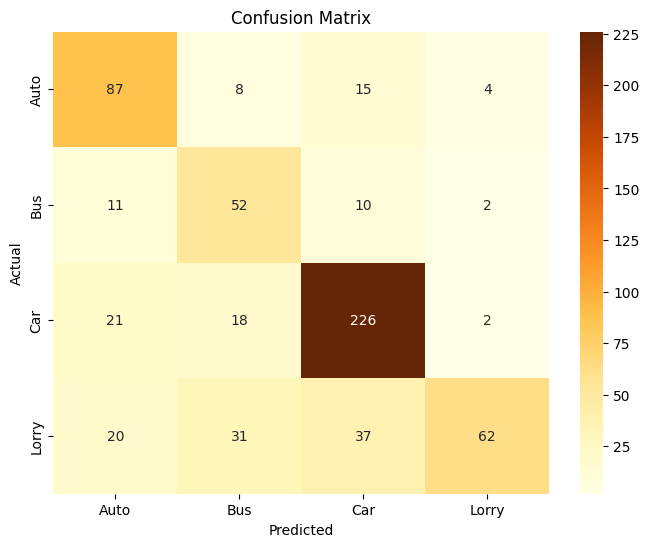

In [18]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

j = 0

# Define the objective function to maximize (accuracy)
def objective_function(params):
    global j
    j = j + 1
    n_neighbors = params[0]

    # Create a KNeighborsClassifier with the current parameters
    knn_clf = KNeighborsClassifier(
        n_neighbors=int(n_neighbors)
    )

    # Fit the model to the training data
    knn_clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_clf.predict(X_test)

    # Calculate accuracy (to be maximized)
    acc = accuracy_score(y_test, y_pred)
    print(acc, "--", j)
    return acc

# Ant Colony Optimization parameters
num_ants = 10
num_iterations = 10
rho = 0.2  # Pheromone decay rate
alpha = 1.5  # Pheromone importance
beta = 2.0  # Heuristic importance

# Search space
search_space = {
    'n_neighbors': (2, 30),
}

# Initialize pheromone levels
pheromones = {param: np.ones(num_ants) for param in search_space}

# Ant Colony Optimization
for iteration in range(num_iterations):
    solutions = []

    # Construct solutions
    for ant in range(num_ants):
        solution = {}

        for param, bounds in search_space.items():
            min_val, max_val = bounds
            pheromone = pheromones[param][ant]

            # Heuristic information (random search)
            heuristic = np.random.uniform(min_val, max_val)

            # Combine pheromone and heuristic information to select parameter value
            probability = (pheromone**alpha) * (heuristic**beta)
            selected_value = np.random.uniform(min_val, max_val) if np.random.rand() < probability else heuristic

            solution[param] = selected_value

        solutions.append(solution)

    # Evaluate solutions
    scores = [objective_function([sol[param] for param in search_space]) for sol in solutions]

    # Update pheromone levels based on the objective function values
    for param, values in pheromones.items():
        for ant in range(num_ants):
            pheromones[param][ant] *= (1 - rho)
            pheromones[param][ant] += alpha * scores[ant]

# Select the best solution from the last iteration
best_solution = solutions[np.argmax(scores)]

# Create the final KNeighborsClassifier with the best parameters
best_knn_clf = KNeighborsClassifier(
    n_neighbors=int(best_solution['n_neighbors'])
)

# Fit the final model to the training data
best_knn_clf.fit(X_train, y_train)
print("Best n_neighbors ->", best_solution['n_neighbors'])
# Make predictions on the test set
y_pred = best_knn_clf.predict(X_test)

# Calculate and print accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Best Test Accuracy: {test_accuracy}')

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot a colored confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Auto', 'Bus', 'Car', 'Lorry'],
            yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Decision Tree**

0.5808580858085809 -- 1
0.5561056105610561 -- 2
0.599009900990099 -- 3
0.6336633663366337 -- 4
0.6089108910891089 -- 5
0.6056105610561056 -- 6
0.6105610561056105 -- 7
0.6254125412541254 -- 8
0.6171617161716172 -- 9
0.6171617161716172 -- 10
0.5511551155115512 -- 11
0.6320132013201321 -- 12
0.6320132013201321 -- 13
0.599009900990099 -- 14
0.6336633663366337 -- 15
0.6287128712871287 -- 16
0.6138613861386139 -- 17
0.6320132013201321 -- 18
0.5577557755775577 -- 19
0.594059405940594 -- 20
0.6320132013201321 -- 21
0.6171617161716172 -- 22
0.6204620462046204 -- 23
0.599009900990099 -- 24
0.599009900990099 -- 25
0.6320132013201321 -- 26
0.6336633663366337 -- 27
0.599009900990099 -- 28
0.6336633663366337 -- 29
0.5693069306930693 -- 30
0.6501650165016502 -- 31
0.6303630363036303 -- 32
0.6287128712871287 -- 33
0.6171617161716172 -- 34
0.5511551155115512 -- 35
0.636963696369637 -- 36
0.6254125412541254 -- 37
0.5577557755775577 -- 38
0.6303630363036303 -- 39
0.599009900990099 -- 40
0.575907590759075

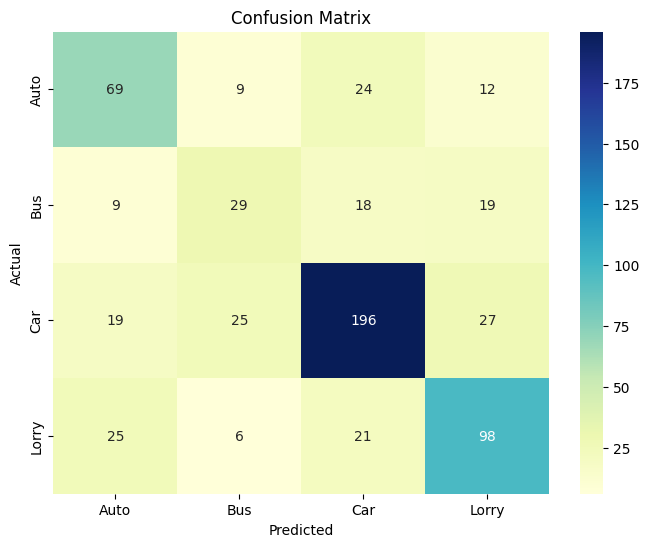

In [22]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

j = 0

# Define the objective function to maximize (accuracy)
def objective_function(params):
    global j
    j = j + 1
    max_depth, min_samples_split, min_samples_leaf = params

    # Create a DecisionTreeClassifier with the current parameters
    dt_clf = DecisionTreeClassifier(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42
    )

    # Fit the model to the training data
    dt_clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = dt_clf.predict(X_test)

    # Calculate accuracy (to be maximized)
    acc = accuracy_score(y_test, y_pred)
    print(acc, "--", j)
    return acc

# Ant Colony Optimization parameters
num_ants = 10
num_iterations = 10
rho = 0.1  # Pheromone decay rate
alpha = 1.0  # Pheromone importance
beta = 2.0  # Heuristic importance

# Search space
search_space = {
    'max_depth': (3, 20),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5),
}

# Initialize pheromone levels
pheromones = {param: np.ones(num_ants) for param in search_space}

# Ant Colony Optimization
for iteration in range(num_iterations):
    solutions = []

    # Construct solutions
    for ant in range(num_ants):
        solution = {}

        for param, bounds in search_space.items():
            min_val, max_val = bounds
            pheromone = pheromones[param][ant]

            # Heuristic information (random search)
            heuristic = np.random.uniform(min_val, max_val)

            # Combine pheromone and heuristic information to select parameter value
            probability = (pheromone**alpha) * (heuristic**beta)
            selected_value = np.random.uniform(min_val, max_val) if np.random.rand() < probability else heuristic

            solution[param] = selected_value

        solutions.append(solution)

    # Evaluate solutions
    scores = [objective_function([sol[param] for param in search_space]) for sol in solutions]

    # Update pheromone levels based on the objective function values
    for param, values in pheromones.items():
        for ant in range(num_ants):
            pheromones[param][ant] *= (1 - rho)
            pheromones[param][ant] += alpha * scores[ant]

# Select the best solution from the last iteration
best_solution = solutions[np.argmax(scores)]

# Create the final DecisionTreeClassifier with the best parameters
best_dt_clf = DecisionTreeClassifier(
    max_depth=int(best_solution['max_depth']),
    min_samples_split=int(best_solution['min_samples_split']),
    min_samples_leaf=int(best_solution['min_samples_leaf']),
    random_state=42
)

print("Best Hyperparameters:")
print(f"Max Depth: {best_solution['max_depth']}")
print(f"Min Samples Split: {best_solution['min_samples_split']}")
print(f"Min Samples Leaf: {best_solution['min_samples_leaf']}")

# Fit the final model to the training data
best_dt_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt_clf.predict(X_test)

# Calculate and print accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Best Test Accuracy: {test_accuracy}')

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot a colored confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Auto', 'Bus', 'Car', 'Lorry'],
            yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**SVM**

0.8729372937293729 -- 1
0.8729372937293729 -- 2
0.8729372937293729 -- 3
0.8729372937293729 -- 4
0.8729372937293729 -- 5
0.8729372937293729 -- 6
0.8729372937293729 -- 7
0.8729372937293729 -- 8
0.8778877887788779 -- 9
0.8729372937293729 -- 10
0.8729372937293729 -- 11
0.8729372937293729 -- 12
0.8729372937293729 -- 13
0.8729372937293729 -- 14
0.8729372937293729 -- 15
0.8729372937293729 -- 16
0.8729372937293729 -- 17
0.8729372937293729 -- 18
0.8729372937293729 -- 19
0.8729372937293729 -- 20
0.8729372937293729 -- 21
0.8729372937293729 -- 22
0.8729372937293729 -- 23
0.8729372937293729 -- 24
0.8729372937293729 -- 25
0.8729372937293729 -- 26
0.8729372937293729 -- 27
0.8729372937293729 -- 28
0.8729372937293729 -- 29
0.8729372937293729 -- 30
0.8729372937293729 -- 31
0.8778877887788779 -- 32
0.8729372937293729 -- 33
0.8729372937293729 -- 34
0.8729372937293729 -- 35
0.8729372937293729 -- 36
0.8729372937293729 -- 37
0.8729372937293729 -- 38
0.8729372937293729 -- 39
0.8729372937293729 -- 40
0.8729372

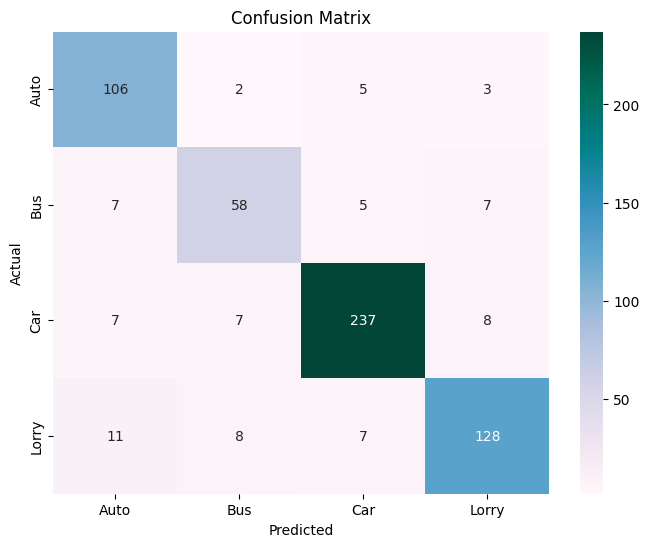

In [12]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are defined

j = 0

# Define the objective function to maximize (accuracy)
def objective_function(params):
    global j
    j = j + 1
    C_param = params[0]

    # Create an SVM with linear kernel using the current parameters
    svm_clf = SVC(
        kernel='linear',
        C=C_param,
        random_state=42
    )

    # Fit the model to the training data
    svm_clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_clf.predict(X_test)

    # Calculate accuracy (to be maximized)
    acc = accuracy_score(y_test, y_pred)
    print(acc, "--", j)
    return acc

# Ant Colony Optimization parameters
num_ants = 10
num_iterations = 10
rho = 0.2  # Pheromone decay rate
alpha = 1.5  # Pheromone importance
beta = 2.5  # Heuristic importance

# Search space
search_space = {
    'C_param': (0, 1),
}

# Initialize pheromone levels
pheromones = {param: np.ones(num_ants) for param in search_space}

# Ant Colony Optimization
for iteration in range(num_iterations):
    solutions = []

    # Construct solutions
    for ant in range(num_ants):
        solution = {}

        for param, bounds in search_space.items():
            min_val, max_val = bounds
            pheromone = pheromones[param][ant]

            # Heuristic information (random search)
            heuristic = np.random.uniform(min_val, max_val)

            # Combine pheromone and heuristic information to select parameter value
            probability = (pheromone**alpha) * (heuristic**beta)
            selected_value = np.random.uniform(min_val, max_val) if np.random.rand() < probability else heuristic

            solution[param] = selected_value

        solutions.append(solution)

    # Evaluate solutions
    scores = [objective_function([sol[param] for param in search_space]) for sol in solutions]

    # Update pheromone levels based on the objective function values
    for param, values in pheromones.items():
        for ant in range(num_ants):
            pheromones[param][ant] *= (1 - rho)
            pheromones[param][ant] += alpha * (scores[ant] - np.mean(scores))

# Select the best solution from the last iteration
best_solution = solutions[np.argmax(scores)]

# Create the final SVM with linear kernel with the best parameters
best_svm_clf = SVC(
    kernel='linear',
    C=best_solution['C_param'],
    random_state=42
)

# Fit the final model to the training data
best_svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_svm_clf.predict(X_test)

# Print the best hyperparameter
print("Best Hyperparameter:")
print(f"C parameter: {best_solution['C_param']}")

# Calculate and print accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Best Test Accuracy: {test_accuracy}')

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot a colored confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBuGn', xticklabels=['Auto', 'Bus', 'Car', 'Lorry'],
            yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
